In [14]:
# 1 .Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Cấu hình hiển thị
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

In [15]:
# 2 .Tải dữ liệu
# Đảm bảo đường dẫn đúng tới file đã làm sạch (output từ data_cleaning.ipynb)
df = pd.read_csv('foodpanda_orders.csv')



In [16]:
# 3. Tổng quan dữ liệu
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

,quantity,price,order_frequency,loyalty_points,rating
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.991667,800.524880,25.304667,250.173667,2.996833
std,1.414778,404.855029,14.358930,144.608478,1.406113
min,1.000000,100.300000,1.000000,0.000000,1.000000
25%,2.000000,441.997500,13.000000,125.000000,2.000000
50%,3.000000,806.460000,25.000000,249.500000,3.000000
75%,4.000000,1149.737500,37.000000,378.000000,4.000000
max,5.000000,1499.950000,50.000000,500.000000,5.000000


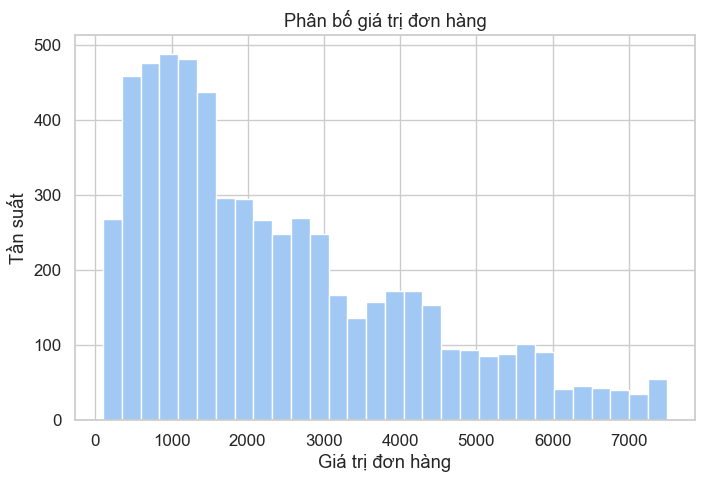

In [17]:
# 4. Trực quan hóa cơ bản
# 4.1 Phân bố giá trị đơn hàng
df['order_value'] = df['quantity'] * df['price']

plt.figure(figsize=(8,5))
plt.hist(df['order_value'], bins=30)
plt.title('Phân bố giá trị đơn hàng')
plt.xlabel('Giá trị đơn hàng')
plt.ylabel('Tần suất')
plt.show()




C:\Users\cnguy\AppData\Local\Temp\ipykernel_5176\4232994212.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




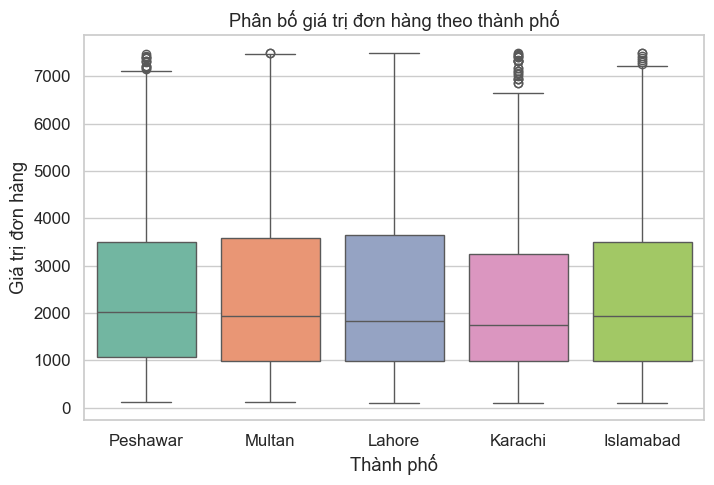

In [18]:
# 4.2 Phân bố giá trị theo thành phố
plt.figure(figsize=(8,5))
sns.boxplot(x='city', y='order_value', data=df, palette='Set2')
plt.title('Phân bố giá trị đơn hàng theo thành phố')
plt.xlabel('Thành phố')
plt.ylabel('Giá trị đơn hàng')
plt.show()


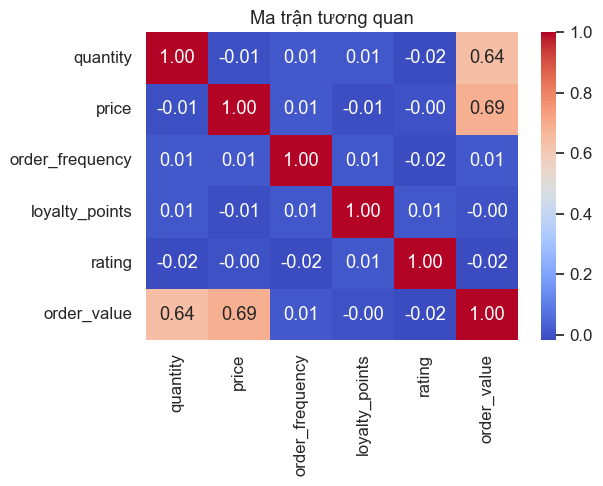

In [19]:
# 5. Phân tích tương quan
#Hiểu mối quan hệ giữa các biến định lượng.
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan')
plt.show()


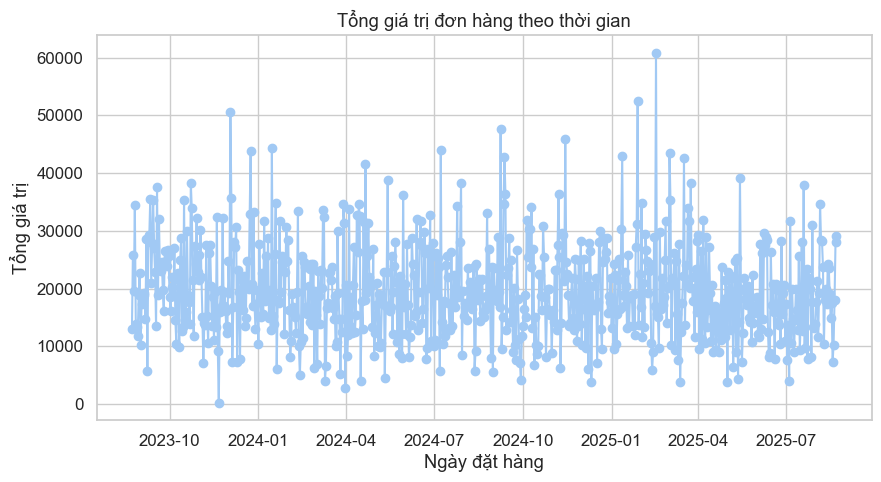

In [20]:
# 6. Phân tích theo thời gian
#Xem xu hướng giá trị đơn hàng theo ngày.
df['order_date'] = pd.to_datetime(df['order_date'])
df_time = df.groupby('order_date')['order_value'].sum()

plt.figure(figsize=(10,5))
plt.plot(df_time.index, df_time.values, marker='o')
plt.title('Tổng giá trị đơn hàng theo thời gian')
plt.xlabel('Ngày đặt hàng')
plt.ylabel('Tổng giá trị')
plt.show()


In [21]:
# --- Tính thời gian giao hàng ---

# Chuyển kiểu dữ liệu sang datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])

# Tính thời gian giao hàng (phút)
df['delivery_time'] = (df['last_order_date'] - df['order_date']).dt.total_seconds() / 60


In [22]:
# 7.Biểu đồ tương tác (Plotly)
#Biểu đồ có thể di chuột và phóng to để khám phá chi tiết.

fig = px.scatter(df, x='delivery_time', y='order_value', color='city',
                 title='Quan hệ giữa thời gian giao và giá trị đơn hàng',
                 hover_data=['order_id'])
fig.show()


In [23]:
# 8. Dashboard tổng hợp
fig = make_subplots(rows=1, cols=2, subplot_titles=('Order Value Distribution', 'Order Value by City'))

fig.add_trace(go.Histogram(x=df['order_value'], nbinsx=30), row=1, col=1)
fig.add_trace(go.Box(y=df['order_value'], x=df['city'], name='By City'), row=1, col=2)

fig.update_layout(title_text='Foodpanda Analytics Dashboard', showlegend=False)
fig.show()
